In [1]:
import numpy as np
import pandas as pd

# Membaca data dengan header
df_radiosonde = pd.read_csv(r'D:\Clean_D96935_2019010112.csv') 

# Merapikan header data
df_radiosonde.columns = [x.strip() for x in df_radiosonde.columns] 
df_radiosonde.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 41 columns):
ObsTime      3158 non-null object
DCnt         3158 non-null object
ST           3158 non-null int64
RE           3158 non-null object
SondeN       3158 non-null int64
FCnt         3158 non-null object
AGC          3158 non-null object
rcvFREQ      3158 non-null object
WM           3158 non-null object
WD           3158 non-null float64
WS           3158 non-null float64
Height       3158 non-null float64
Xdistanc     3158 non-null float64
Ydistanc     3158 non-null float64
GF           3158 non-null object
HDP          3158 non-null object
PDP          3158 non-null object
GeodetLat    3158 non-null float64
GeodetLon    3158 non-null float64
V            3158 non-null int64
Press0       3158 non-null float64
Temp0        3158 non-null float64
Humi0        3158 non-null object
FE           3158 non-null object
FRT          3158 non-null object
FTI          3158 non-null object
FVH

In [10]:
contohdata = 'https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv'
df = pd.read_csv(contohdata)
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [16]:
# Standar missing value
df['ST_NUM']
print(df['ST_NUM'].isnull())
print('Data yang salah adalah:', df['ST_NUM'].isnull().sum())

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool
Data yang salah adalah: 2


In [17]:
#Missing value tidak standar
df['NUM_BEDROOMS']
print(df['NUM_BEDROOMS'].isnull())
print('Data yang salah adalah: ', df['NUM_BEDROOMS'].isnull().sum())

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7     True
8     True
Name: NUM_BEDROOMS, dtype: bool
Data yang salah adalah:  4


In [20]:
missing_values = ['n/a', 'na', '--']
df = pd.read_csv(contohdata, na_values = missing_values)
df['NUM_BEDROOMS'].isnull()
print(df['NUM_BEDROOMS'].isnull())
print('Data yang salah adalah: ', df['NUM_BEDROOMS'].isnull().sum())

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7     True
8     True
Name: NUM_BEDROOMS, dtype: bool
Data yang salah adalah:  4


In [22]:
data = pd.ExcelFile('D:/obes.xls')
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

221


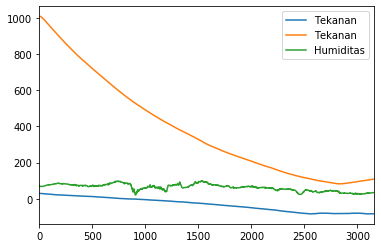

In [24]:
# Cek data error
missingvalue = ['-----']
df_radiosondeclean = pd.read_csv(r'D:\Clean_D96935_2019010112.csv', na_values = missingvalue)
print(df_radiosondeclean['Humi0'].isnull().sum())

df_radiosondeclean.columns = [x.strip() for x in df_radiosondeclean.columns]

df_radiosondeclean['Temp0'].plot(label = 'Tekanan', legend = True)
df_radiosondeclean['Press0'].plot(label = 'Tekanan', legend = True)
df_radiosondeclean['Humi0'].plot(label = 'Humiditas', legend = True)

In [31]:
from datetime import datetime
date_rng = pd.date_range(start = '19:00:00', end = '19:23:00', freq = 'T')
date_rng

DatetimeIndex(['2020-12-21 19:00:00', '2020-12-21 19:01:00',
               '2020-12-21 19:02:00', '2020-12-21 19:03:00',
               '2020-12-21 19:04:00', '2020-12-21 19:05:00',
               '2020-12-21 19:06:00', '2020-12-21 19:07:00',
               '2020-12-21 19:08:00', '2020-12-21 19:09:00',
               '2020-12-21 19:10:00', '2020-12-21 19:11:00',
               '2020-12-21 19:12:00', '2020-12-21 19:13:00',
               '2020-12-21 19:14:00', '2020-12-21 19:15:00',
               '2020-12-21 19:16:00', '2020-12-21 19:17:00',
               '2020-12-21 19:18:00', '2020-12-21 19:19:00',
               '2020-12-21 19:20:00', '2020-12-21 19:21:00',
               '2020-12-21 19:22:00', '2020-12-21 19:23:00'],
              dtype='datetime64[ns]', freq='T')

In [36]:
# df = df_radiosondeclean.groupby(date_rng)
df = pd.DataFrame(date_rng, columns = ['date'])
df['data'] = np.random.randint(0, 100, size = (len(date_rng)))
df.head()

,date,data
0,2020-12-21 19:00:00,16
1,2020-12-21 19:01:00,92
2,2020-12-21 19:02:00,37
3,2020-12-21 19:03:00,36
4,2020-12-21 19:04:00,67


In [38]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv', index_col = 0, parse_dates = True)
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


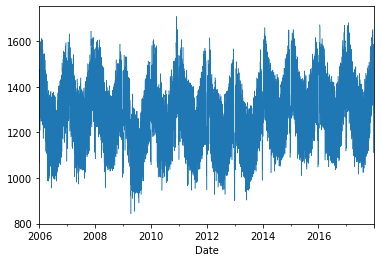

In [40]:
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday'] = opsd_daily.index.weekday
opsd_daily.head()
# plotting
opsd_daily['Consumption'].plot(linewidth = 0.5)

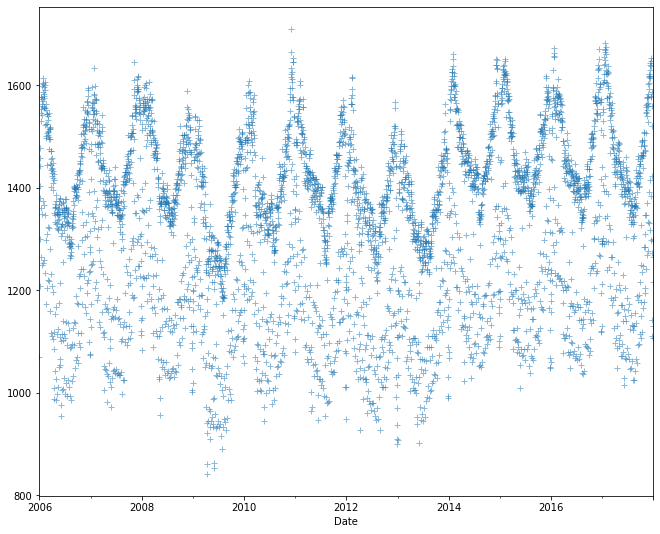

In [68]:
opsd_daily['Consumption'].plot(marker = '+', alpha = 0.5, linestyle = 'None', figsize = (11,9))

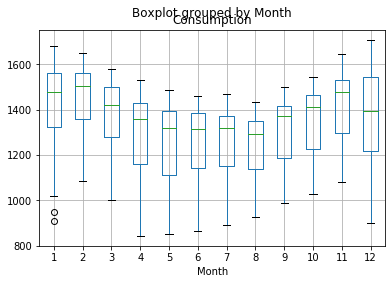

In [70]:
# Boxplot
opsd_daily.boxplot(column = ['Consumption'], by = 'Month')